In [1]:
import sympy as sp
from sympy import sin, cos

sp.init_printing()

In [9]:
theta, phi, l = sp.symbols('theta phi lambda')

In [4]:
sigma_z = sp.Array([[1, 0], [0, 1]])
sigma_x = sp.Array([[0, 1], [1, 0]])
sigma_y = sp.Array([[0, -1j], [1j, 0]])

In [11]:
sp.simplify((cos(theta) - l)*(-cos(theta) - l))

In [13]:
sp.simplify((sin(theta)*cos(phi)-1j*sin(theta)*sin(phi))*(sin(theta)*cos(phi)+1j*sin(theta)*sin(phi)))

solving above gives me expected $\lambda = \pm 1$

In [15]:
x, y = sp.symbols('x y')

In [21]:
[x*(cos(theta)-1) + y*sin(theta)*(cos(phi)-1j*(sin(phi))), 
             x*sin(theta)*(cos(phi)+1j*(sin(phi))) - y*(cos(theta)+1), ]

In [22]:
sp.linsolve([x*(cos(theta)-1) + y*sin(theta)*(cos(phi)-1j*(sin(phi))), 
             x*sin(theta)*(cos(phi)+1j*(sin(phi))) - y*(cos(theta)+1), ], (x, y))

## Exercise 3.3

In [7]:
operator = sp.Matrix([[cos(theta), sin(theta)], [sin(theta), -cos(theta)]])

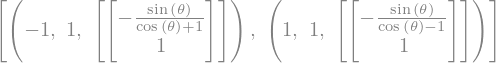

In [8]:
operator.eigenvects()

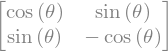

In [9]:
operator

## Exercise 4.6

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
p1 = lambda t: (1+np.sin(t))/2 # = Prob(sigma_y == 1)
p2 = lambda t: (1-np.sin(t))/2 # = Prob(sigma_y == -1)

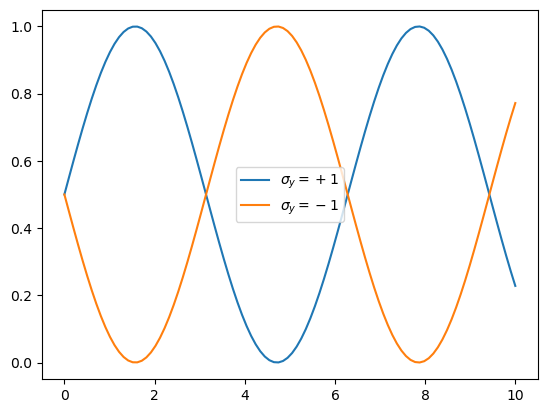

In [6]:
t = np.linspace(0, 10, 100)
plt.plot(t, p1(t), label="$\sigma_y = +1$")
plt.plot(t, p2(t), label="$\sigma_y = -1$")
plt.legend();

In [7]:
q1 = lambda t: (1+np.cos(t))/2 # = Prob(sigma_x == 1)
q2 = lambda t: (1-np.cos(t))/2 # = Prob(sigma_x == -1)

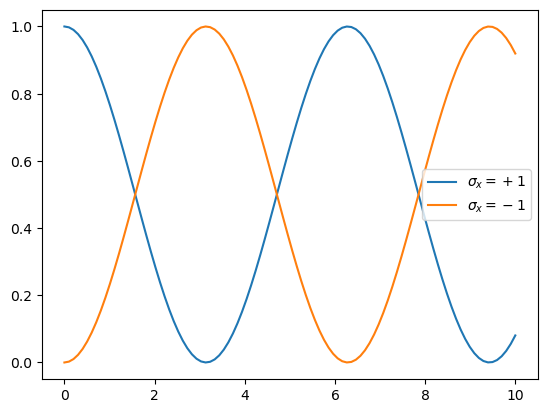

In [8]:
t = np.linspace(0, 10, 100)
plt.plot(t, q1(t), label="$\sigma_x = +1$")
plt.plot(t, q2(t), label="$\sigma_x = -1$")
plt.legend();

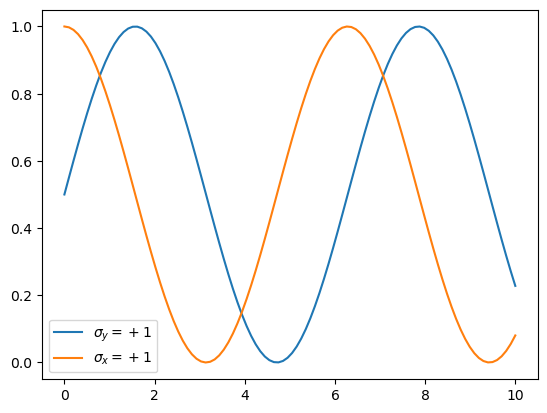

In [10]:
t = np.linspace(0, 10, 100)
plt.plot(t, p1(t), label="$\sigma_y = +1$")
plt.plot(t, q1(t), label="$\sigma_x = +1$")
plt.legend();